This dataset is taken from [Kaggle](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset/).<br> It contains 2 files, Fake.csv which consists of "fake articles" and True.csv consists of "real articles". 


#Data Pre-processing

In [5]:
import pandas as pd

First we load the data into the data frame 


In [6]:
true = pd.read_csv("drive/MyDrive/Colab Notebooks/True.csv")
fake = pd.read_csv("drive/MyDrive/Colab Notebooks/Fake.csv")
#train = pd.read_csv("drive/MyDrive/Colab Notebooks/train.csv")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#train.info()

In [9]:
#train.isna().sum()

In [10]:
#train.dropna()

In [11]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [12]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [13]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [15]:
print('There are ', len(true),'rows and ', len(true.columns), 'columns for True.csv.')
print('There are ', len(fake),'rows and ', len(fake.columns), 'columns for Fake.csv.')

There are  21417 rows and  4 columns for True.csv.
There are  23481 rows and  4 columns for Fake.csv.


Since no. of fake articles are more than that of true article, so, to remove bias in the dataset, we drop 2406 fake articles randomly.

In [16]:
fake=fake.drop(fake.sample(n=2064).index)

In [17]:
true.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [18]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Adding a 'target' column in both dataframes to identify fake articles with the value 'fake' and real articles with the value 'real'.

In [19]:
true['target'] = 'true'
fake['target'] = 'fake'

In [20]:
fake.head()

,title,text,subject,date,target
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake


In [21]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


With the help of concat function we are concating fake data and true data into a new data frame called news_df.
<br>
We are using the reset_index function to reset the index.

In [22]:
news_df = pd.concat([fake,true]).reset_index(drop = True)

In [23]:
#data=pd.concat([fake,true,train]).reset_index(drop = True)

In [24]:
print('There are ', len(news_df),'rows and ', len(news_df), 'columns for news_df dataframe')

There are  42834 rows and  42834 columns for news_df dataframe


In [25]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42834 entries, 0 to 42833
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    42834 non-null  object
 1   text     42834 non-null  object
 2   subject  42834 non-null  object
 3   date     42834 non-null  object
 4   target   42834 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [26]:
news_df.head()

,title,text,subject,date,target
0,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
1,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
2,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
3,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
4,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake


Shuffle package is used to prevent the bias which can be done from the module sklearn. 
<br>
We are using reset_index to create a new index for the new file by removing the indexes of the two uploaded files.

In [27]:
from sklearn.utils import shuffle
news_df = shuffle(news_df)
news_df = news_df.reset_index(drop = True)

In [28]:
#from sklearn.utils import shuffle
#data = shuffle(data)
#data = data.reset_index(drop = True)

In [29]:
#data.head()

As we won't be using '*title*' and '*date*' columns therefore we will be removing that column

In [30]:
news_df.drop(['title'],axis = 1,inplace = True)
news_df.drop(['date'],axis = 1,inplace = True)

In [31]:
news_df.head()

,text,subject,target
0,BRUSSELS (Reuters) - NATO allies backed plans ...,worldnews,true
1,The Republican Party is truly screwed if Fox N...,News,fake
2,Could it be Hillary s scre-e-e-eching that tur...,politics,fake
3,With Donald Trump handing out nicknames left a...,News,fake
4,JOHANNESBURG (Reuters) - South Africa s ruling...,worldnews,true


In [32]:
# Here, we are merging the rows politicsNews and politics into politics.
news_df = news_df.replace('politicsNews','politics')
news_df.head()

,text,subject,target
0,BRUSSELS (Reuters) - NATO allies backed plans ...,worldnews,true
1,The Republican Party is truly screwed if Fox N...,News,fake
2,Could it be Hillary s scre-e-e-eching that tur...,politics,fake
3,With Donald Trump handing out nicknames left a...,News,fake
4,JOHANNESBURG (Reuters) - South Africa s ruling...,worldnews,true


Now we will convert the '*text*' column to lowercase

In [33]:
news_df['text'] = news_df['text'].str.lower()

In [34]:
news_df.head()

,text,subject,target
0,brussels (reuters) - nato allies backed plans ...,worldnews,true
1,the republican party is truly screwed if fox n...,News,fake
2,could it be hillary s scre-e-e-eching that tur...,politics,fake
3,with donald trump handing out nicknames left a...,News,fake
4,johannesburg (reuters) - south africa s ruling...,worldnews,true


Now, we are defining the function remove_punctuation and removing all the punctuation marks from the 'text' column. 

In [35]:
import string
#string.punctuation method returns the list of all punctuation marks.
#So, here we are removing all the punctuation marks.

def remove_punctuation(text):
  list_data = [char for char in text if char not in string.punctuation]
  clean_string = ''.join(list_data)
  return clean_string

news_df['text'] = news_df['text'].apply(remove_punctuation)
# .apply is used to invoke the function named as remove_punctuation.

In [36]:
news_df['text'].head(5)

0    brussels reuters  nato allies backed plans on ...
1    the republican party is truly screwed if fox n...
2    could it be hillary s screeeeching that turns ...
3    with donald trump handing out nicknames left a...
4    johannesburg reuters  south africa s ruling af...
Name: text, dtype: object

Now, we are removing the stopwords

In [37]:
# nltk stands for Natural Lnaguage Toolkit and it is used to build programs for text analysis. 
# It contains nltk.corpus module from which "stopwords" is imported to run the below program.
import nltk as nl
nl.download('stopwords')
# stopwords are the set of commonly used words like "a", "the", "as" etc. which do not provide much meaning to a sentence.
# And here, we are removing those words. 

from nltk.corpus import stopwords
stop = stopwords.words('english')
# NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. 
# Here, stopwords.word('english') gives us all the stopwords in English language.

news_df['text'] = news_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# The above code is checking for a stopword in every word in the text column 
# and if a stopword is found it is removed, otherwise 
# the words are joined leaving a space between them. 
news_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,subject,target
0,brussels reuters nato allies backed plans wedn...,worldnews,true
1,republican party truly screwed fox news thinki...,News,fake
2,could hillary screeeeching turns offdonald tru...,politics,fake
3,donald trump handing nicknames left right one ...,News,fake
4,johannesburg reuters south africa ruling afric...,worldnews,true


## Data Exploration


Now lets count the number of fake and real articles

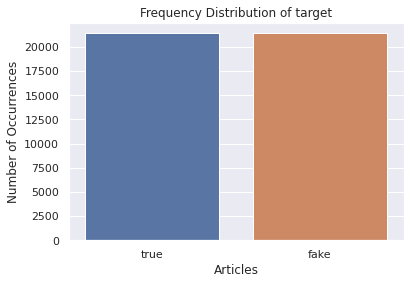

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
t_values = news_df["target"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x = t_values.index, y = t_values.values)
plt.title('Frequency Distribution of target')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Articles', fontsize=12)
plt.show()

Counting the articles falling under each subject

In [39]:
print(news_df['subject'].value_counts())

politics           17460
worldnews          10145
News                8311
left-news           4054
Government News     1417
US_News              730
Middle-east          717
Name: subject, dtype: int64


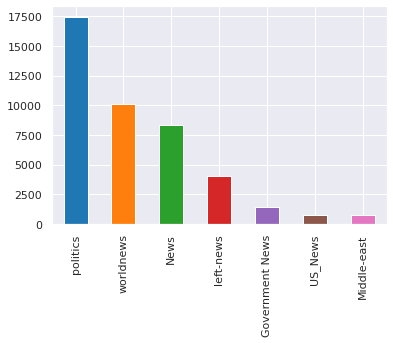

In [40]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2']
news_df['subject'].value_counts().plot.bar(color=colors)

#Statistical Analysis

#Contingency Table

In [41]:
news_crosstab = pd.crosstab(news_df['subject'], news_df['target'],margins = False,normalize="columns")  
# distribution of subject column wise.
print(news_crosstab) 

target               fake      true
subject                            
Government News  0.066162  0.000000
Middle-east      0.033478  0.000000
News             0.388056  0.000000
US_News          0.034085  0.000000
left-news        0.189289  0.000000
politics         0.288929  0.526311
worldnews        0.000000  0.473689


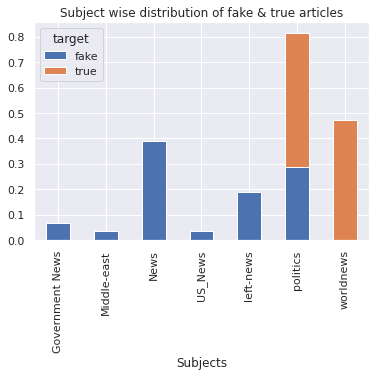

In [42]:
news_crosstab.plot.bar(stacked=True) 
plt.title('Subject wise distribution of fake & true articles')
plt.ylabel('', fontsize=12)
plt.xlabel('Subjects', fontsize=12)
plt.show()  

## Chi-square test

Now, let's check if there is any relation between columns subject and target by using Chi-square test.

So we define,<br>
**Null hypothesis H0** : Column 'target' doesnot depend on 'subject'
                      i.e., An article being fake or not doesnot depend  on the domain of news.<br>
**Alternate hypothesis H1** : Column 'target' depends on 'subject'
                      i.e., An article being fake or not depends on the domain of news.        

In [43]:
from scipy.stats import chi2_contingency 
stat, p, dof, expected = chi2_contingency(news_crosstab)  # stat gives the tabualted chi-square value,
                                                          
# interpreting p-value 

print("p value is " + str(round(p,4))) 
if p <= 0.05: 
    print('Variables "Target" and "subject" are dependent (reject H0)') 
else: 
    print('Variables "Target" and "subject" are independent (H0 holds true)') 

p value is 0.9741
Variables "Target" and "subject" are independent (H0 holds true)


Creating most frequent words function

To check most frequent words in fake news

In [44]:
import seaborn as sns
import nltk
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]]) 
    # In all_words, we are joining all the values of text column into one sentence 
    # and then passing into tokenizer.
    token_phrase = token_space.tokenize(all_words)
    # Here, with the help of tokenize.WhitespaceTokenizer(), we are splitting the sentence
    # into words using the delimeters space, new line and tab.
    frequency = nltk.FreqDist(token_phrase) # counts the number of times the words are occuring and it returns dictionary
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
    print(type(frequency))
    # nlargest() is a Pandas library function and here, we are using it to extract the first n rows.
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", palette="Blues_r")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='horizontal')
    plt.show()

<class 'nltk.probability.FreqDist'>


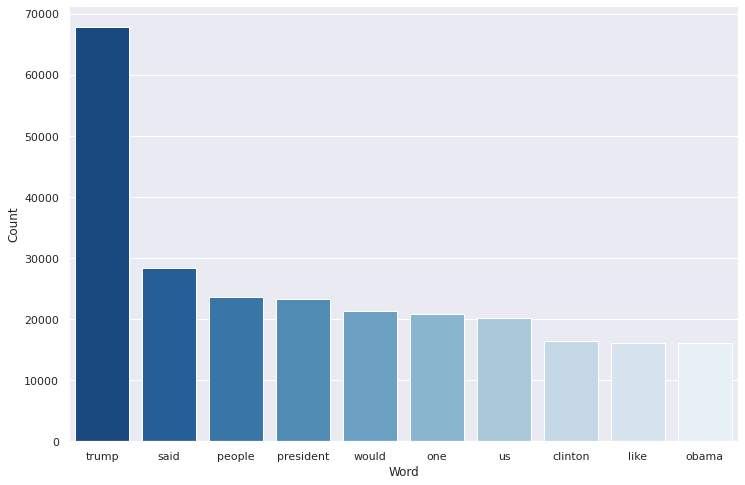

In [45]:
counter(news_df[news_df['target'] == 'fake'], 'text', 10)
# The first parameter is choosing the fake articles and the second parameter 
# takes the 'text' column from fake data to identify the top 10 occuring words.

Most frequent words in real news

<class 'nltk.probability.FreqDist'>


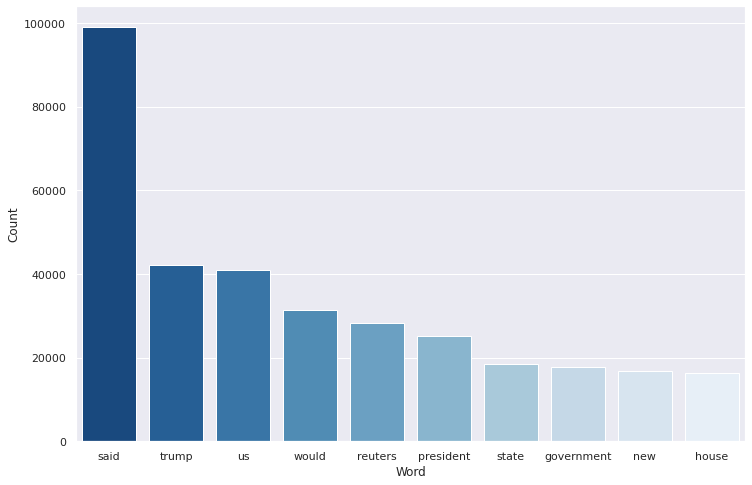

In [46]:
counter(news_df[news_df['target'] == 'true'], 'text', 10)

Creating a word cloud for fake news

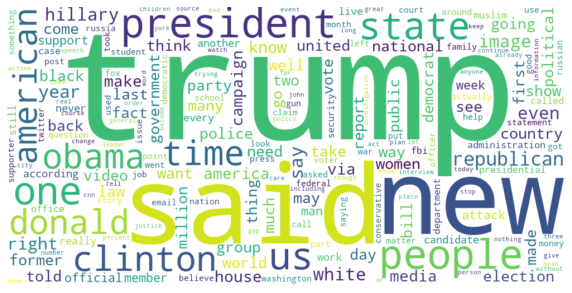

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
fake_data = news_df[news_df["target"] == "fake"]

all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white', collocations = False,min_font_size=10).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
# we are using interpolation parameter and the value that we are passing 
# is bilinear which smoothens the image.
plt.axis("off")
plt.show()

#Modelling

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = news_df['text']
y = news_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                    

Vectorizing

In [50]:
#Applying TF-IDF 

# TfidfTransformer is used is to scale down the impact of tokens that occur
# very frequently in a given corpus and that are hence empirically less 
# informative than features that occur in a small fraction of the training corpus.

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
vectorization=TfidfVectorizer()

In [52]:
XV_train=vectorization.fit_transform(X_train)
XV_test=vectorization.transform(X_test)

Defining function for confusion matrix

In [53]:
from sklearn import metrics # This module is used to find the accuracy score.
import itertools # This module is used for infinite iterations and here we are using it for # cartesian product.
import numpy as np
from sklearn.model_selection import train_test_split

def confusion_matrix(cm, classes,title='Confusion Matrix', cmap=plt.cm.Purples):
# The parameters of the fucntion confusion_matrix are cm, which is an ndarray, 
# classes which are the labels for the output, title to set the title of the graph 
# and cmap gives the colour of the graph.

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    t_marks = np.arange(len(classes)) # Here, it is taking values [0,1].
    plt.xticks(t_marks, classes) 
    plt.yticks(t_marks, classes)

    # Here, Fake News takes the value 0 and Real News takes 
    # the value 1 and hence giving us a 2x2 matrix.

    print('Confusion Matrix')

    t = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > t else "black")
    
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')

Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
LR=LogisticRegression()
LR.fit(XV_train,y_train)
prediction_LR=LR.predict(XV_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_LR)*100,2)))

accuracy: 98.95%


Confusion Matrix


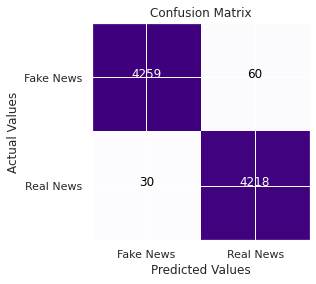

In [56]:
cm = metrics.confusion_matrix(y_test, prediction_LR)
confusion_matrix(cm, classes=['Fake News', 'Real News'])

Generate a classification report

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_LR))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4319
        true       0.99      0.99      0.99      4248

    accuracy                           0.99      8567
   macro avg       0.99      0.99      0.99      8567
weighted avg       0.99      0.99      0.99      8567



Naive Baye's Classifier Model

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
NB = MultinomialNB()    
NB.fit(XV_train,y_train)
prediction_NB=NB.predict(XV_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_NB)*100,2)))

accuracy: 93.25%


Confusion Matrix


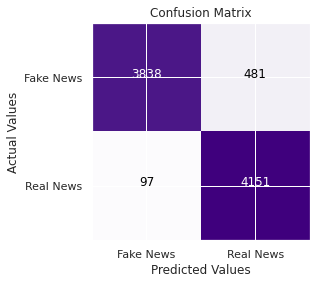

In [60]:
cm = metrics.confusion_matrix(y_test, prediction_NB)
confusion_matrix(cm, classes=['Fake News', 'Real News'])

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_NB))

              precision    recall  f1-score   support

        fake       0.98      0.89      0.93      4319
        true       0.90      0.98      0.93      4248

    accuracy                           0.93      8567
   macro avg       0.94      0.93      0.93      8567
weighted avg       0.94      0.93      0.93      8567



In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
prediction=model.predict(X_test)
# Accuracy
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.64%


# Manual Testing

In [63]:
news_df.to_csv("manual_testing.csv")

In [72]:
def  result(n):
  if n=='fake':
    return "Fake News"
  elif n=='true':
    return "Real News"

def ManualTesting(news):
  test_news={"text":[news]}
  new_test_df=pd.DataFrame(test_news)
  new_test_df["text"]=new_test_df["text"].apply(remove_punctuation)
  new_test_df["text"]=new_test_df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  new_x_test=new_test_df["text"]
  new_xv_test=vectorization.transform(new_x_test)
  LR_pred=LR.predict(new_xv_test)
  #DT_pred=model.predict(new_x_test)
  return print("\n\n Logistic Prediction :  ",result(LR_pred))

In [74]:
print("Enter the news you would like to check ")
news=str(input())
ManualTesting(news)

Enter the news you would like to check 
Right now, the whole world is looking at the shocking fact that Democrat Doug Jones beat Republican Roy Moore in the special election to replace Attorney General Jeff Sessions in the United States Senate. Of course, Moore s candidacy was rocked by allegations of sexually harassing and even molesting teenage girls   and being banned from the mall in his hometown of Gadsden, Alabama for doing so.Even before that, Moore was an incendiary character in Alabama politics, having been removed as Chief Justice of the Alabama Supreme Court not once but twice, and having made statements such as Muslims should not be allowed in Congress and homosexuality should be illegal. Hell, he even said that the last time America was great was when we had slavery. Therefore, he was an extraordinarily damaged candidate as it was. However, despite all of this, Alabama is a deep red state, with many voters agreeing with some of Moore s more extreme positions, and some even

In [66]:
# Manual testing for decision tree


# Website

Using Flask

In [75]:
!pip install flask-ngrok

In [77]:
text = '''
<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">

    <title>Fake News Prediction</title>
    <link href="https://getbootstrap.com/docs/4.0/dist/css/bootstrap.min.css" rel="stylesheet">
    
    <style>
    .bg-info {
    background-color: #007bff!important;
    }
    form {
    max-width: 900px;
    margin: 50px auto;
    padding: 30px;
    }
    body{
     background-image: url("https://www.reportlinker.com/insight/wp-content/uploads/2016/12/Fotolia_62358287_S.jpg");
     
    }
    </style>
  </head>

<body>
    <form method="POST", action="#">
                        <div class="card border-primary rounded-0" >
                            <div class="card-header p-0">
                                <div class="bg-info text-white text-center py-2">
                                    <h3><i class="fa fa-envelope"></i> Welcome</h3>
                                    <p class="m-0">Fake News Prediction </p>
                                </div>
                            </div>
                            <div class="card-body p-3">
                                <div class="form-group">
                                    <div class="input-group mb-2">
                                       
                                        <textarea rows="15" name ='u' class="form-control" placeholder="Please enter the article here..." required></textarea>
                                    </div>
                                </div>

                                <div class="text-center">
                                   <input type="submit" class="btn btn-outline-primary" value="Verify" ></input>
                                <p id="demo"></p>

                                </div>
                            </div>

                        </div>
                    </form>
</body>
'''
file = open("templates/text.html","w")
file.write(text)
file.close()

In [ ]:
!pip install flask_ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template
from flask import Flask,request
app = Flask(__name__)
run_with_ngrok(app)
@app.route('/')
def text():
  return render_template('text.html')

@app.route('/',methods=['POST','GET'])
def my_form_post():
  if request.method == "POST":
    t = request.form['u']
    test_news={"text":[t]}
    new_test_df=pd.DataFrame(test_news)
    new_test_df["text"]=new_test_df["text"].apply(remove_punctuation)
    new_test_df["text"]=new_test_df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    new_x_test=new_test_df["text"]
    new_xv_test=vectorization.transform(new_x_test)
    LR_pred=LR.predict(new_xv_test)
    if LR_pred=='fake':
      return "Fake News"
    elif LR_pred=='true':
      return "Real News"
   

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://def794b6fa03.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [21/May/2021 15:43:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2021 15:43:28] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [21/May/2021 15:43:39] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2021 15:43:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2021 15:45:14] "POST / HTTP/1.1" 200 -
